In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [3]:
#load data
student_regs = pd.read_csv('studentRegistration.csv')
student_regs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
#membuat dua kolom baru, 'unregistered' dan 'registered' untuk memisahkan siswa yang telah mendaftar dan tidak.
student_regs['unregistered'] = np.where(student_regs.date_unregistration=='?', 0, 1)
student_regs['registered'] = np.where(student_regs.date_unregistration=='?', 0, 1)

In [5]:
#dataframe baru berisi informasi tentang jumlah siswa yang terdaftar dan tidak terdaftar berdasarkan ID siswa
student_interest = student_regs[['id_student', 'registered', 'unregistered']].groupby(['id_student']).sum()
student_interest = student_interest.reset_index()
student_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id_student    28785 non-null  int64
 1   registered    28785 non-null  int32
 2   unregistered  28785 non-null  int32
dtypes: int32(2), int64(1)
memory usage: 449.9 KB


<AxesSubplot:>

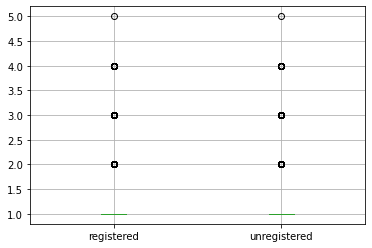

In [6]:
#visualisasi jumlah 'registered' dan 'unregistered'
student_interest[['registered', 'unregistered']].boxplot()

<AxesSubplot:>

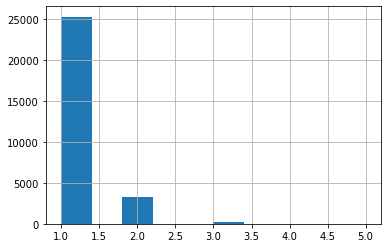

In [7]:
# hitogram
student_interest.unregistered.hist()

In [8]:
#mengubah nilai NaN menjadi 0
student_regs['register_days'] = (np.where(student_regs.date_registration=='?', 0, 
                                          student_regs.date_registration)).astype(int)
student_regs['unregister_days'] = (np.where(student_regs.date_unregistration=='?', 0, 
                                            student_regs.date_unregistration)).astype(int)

In [9]:
# membuat dataFrame baru student_reg_days yang berisi nilai rata-rata dari 'register_days' dan 'unregister_days'
student_reg_days = student_regs[['id_student', 'register_days', 
                                   'unregister_days']].groupby(['id_student']).mean()
student_reg_days = student_reg_days.reset_index()
student_reg_days.head()

,id_student,register_days,unregister_days
0,3733,-68.0,-8.000000e+00
1,6516,-52.0,-2.147484e+09
2,8462,-87.5,6.850000e+01
3,11391,-159.0,-2.147484e+09
4,23629,-47.0,-2.147484e+09


<AxesSubplot:>

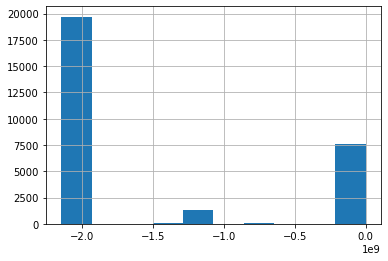

In [10]:
#histogram kolom 'unregister' setelah dipreprocessing
student_reg_days.unregister_days.hist()